In [ ]:
#get CSV file from git repo
!wget -O CovidFactTable.csv https://raw.githubusercontent.com/zhrmnch/CSI4142_Phase3/main/tables/CovidFactTable.csv
!wget -O CrimeFactTable.csv https://raw.githubusercontent.com/zhrmnch/CSI4142_Phase3/main/tables/CrimeFactTable.csv
!wget -O IncidentTable.csv https://raw.githubusercontent.com/zhrmnch/CSI4142_Phase3/main/tables/IncidentTable.csv
!wget -O LocationTable.csv https://raw.githubusercontent.com/zhrmnch/CSI4142_Phase3/main/tables/LocationTable.csv
!wget -O NeighbourhoodTable.csv https://raw.githubusercontent.com/zhrmnch/CSI4142_Phase3/main/tables/NeighbourhoodTable.csv
!wget -O OccurrenceTable.csv https://raw.githubusercontent.com/zhrmnch/CSI4142_Phase3/main/tables/OccurrenceTable.csv
!wget -O PremiseTable.csv https://raw.githubusercontent.com/zhrmnch/CSI4142_Phase3/main/tables/PremiseTable.csv
!wget -O ReportedTable.csv https://raw.githubusercontent.com/zhrmnch/CSI4142_Phase3/main/tables/ReportedTable.csv

#Part A. Data summarization

In [44]:
import pandas as pd
crime_fact_table = pd.read_csv('/content/CrimeFactTable.csv')
premise = pd.read_csv('/content/PremiseTable.csv')
incident = pd.read_csv('/content/IncidentTable.csv')
location = pd.read_csv('/content/LocationTable.csv')
occurrence_date = pd.read_csv('/content/OccurrenceTable.csv')
reported_date = pd.read_csv('/content/ReportedTable.csv')
neighbourhood = pd.read_csv('/content/NeighbourhoodTable.csv')
covid_fact_table = pd.read_csv('/content/CovidFactTable.csv')

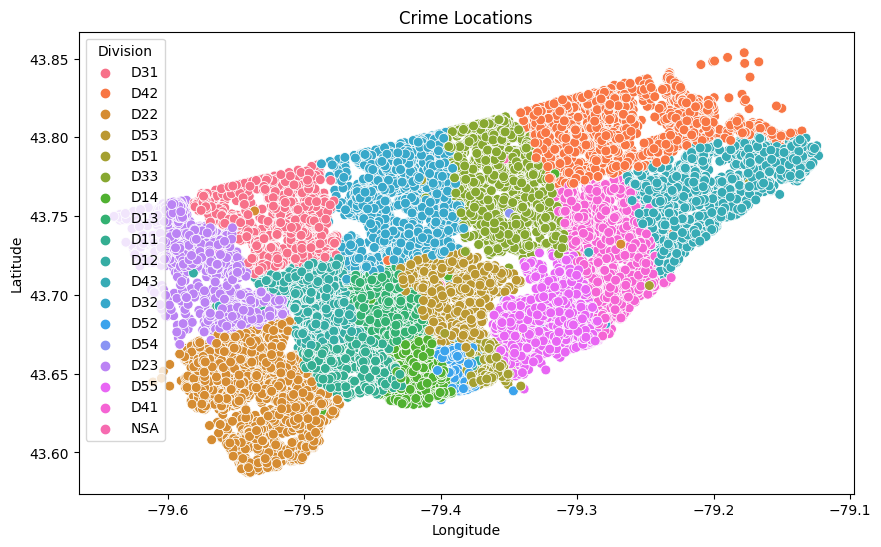

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=location, x='Longitude', y='Latitude', hue='Division', s=50)
plt.title('Crime Locations')
plt.show()

#Part A. Data transformation

##Handling Missing Attributes

In [6]:
# Check for missing values
print(crime_fact_table.isnull().sum())

premise_PK          0
incident_PK         0
location_PK         0
occurence_PK        0
reported_PK         0
neighbourhood_PK    0
dtype: int64


In [7]:
# Check for missing values
print(covid_fact_table.isnull().sum())

Cases               0
year                0
month               0
neighbourhood_PK    0
dtype: int64


In [8]:
# Check for missing values
print(incident.isnull().sum())

incident_PK     0
mci_category    0
offence         0
ucr_code        0
ucr_ext         0
dtype: int64


In [9]:
# Check for missing values
print(location.isnull().sum())

location_PK    0
Division       0
Longitude      0
Latitude       0
dtype: int64


In [10]:
# Check for missing values
print(neighbourhood.isnull().sum())

neighbourhood_PK    0
Neighbourhood       0
Shape__Area         0
Shape__Length       0
dtype: int64


In [11]:
# Check for missing values
print(occurrence_date.isnull().sum())

occurence_PK       0
occurrencedate     0
occurrencehour     0
occurrenceday      0
occurrencemonth    0
occurrenceyear     0
dtype: int64


In [12]:
# Check for missing values
print(reported_date.isnull().sum())

reported_PK      0
reporteddate     0
reportedhour     0
reportedday      0
reportedmonth    0
reportedyear     0
dtype: int64


In [13]:
# Check for missing values
print(premise.isnull().sum())

premise_PK       0
location_type    0
premises_type    0
dtype: int64


In [ ]:
# If there are missing values can fill with mean 
# e.g. crime_fact_table.fillna(crime_fact_table.mean(), inplace=True)

##One-hot encoding/Conversion to ordinal data

In [51]:
incident_encoded = pd.get_dummies(incident, columns=['mci_category'], prefix='mci')
incident_encoded

,incident_PK,offence,ucr_code,ucr_ext,mci_Assault,mci_Auto Theft,mci_Break and Enter,mci_Robbery,mci_Theft Over
0,1,Assault,1430,100,1,0,0,0,0
1,2,B&E,2120,200,0,0,1,0,0
2,3,Theft Over,2130,210,0,0,0,0,1
3,4,Robbery - Business,1610,210,0,0,0,1,0
4,5,Theft From Motor Vehicle Over,2132,200,0,0,0,0,1
5,6,B&E W'Intent,2120,220,0,0,1,0,0
6,7,Assault - Force/Thrt/Impede,1430,110,1,0,0,0,0
7,8,Assault Peace Officer,1460,100,1,0,0,0,0
8,9,Assault With Weapon,1420,100,1,0,0,0,0
9,10,Theft Of Motor Vehicle,2135,210,0,1,0,0,0


In [30]:
premise_encoded = pd.get_dummies(premise, columns=['location_type', 'premises_type'], prefix=['loc', 'prem'])
premise_encoded

,premise_PK,"loc_Apartment (Rooming House, Condo)","loc_Bank And Other Financial Institutions (Money Mart, Tsx)",loc_Bar / Restaurant,loc_Cargo Train,"loc_Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)",loc_Community Group Home,"loc_Construction Site (Warehouse, Trailer, Shed)",loc_Convenience Stores,"loc_Dealership (Car, Motorcycle, Marine, Trailer, Etc.)",...,loc_Ttc Wheel Trans Vehicle,loc_Universities / Colleges,loc_Unknown,prem_Apartment,prem_Commercial,prem_Educational,prem_House,prem_Other,prem_Outside,prem_Transit
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,8,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,10,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
location['division_encoded'] = encoder.fit_transform(location['Division'])
location

,location_PK,Division,Longitude,Latitude,division_encoded
0,1,D31,-79.504475,43.766371,6
1,2,D42,-79.217083,43.814861,10
2,3,D22,-79.534957,43.589085,4
3,4,D53,-79.346588,43.703212,14
4,5,D22,-79.531916,43.645247,4
...,...,...,...,...,...
20103,20104,D33,-79.393966,43.794151,8
20104,20105,D53,-79.406298,43.702062,14
20105,20106,D43,-79.139115,43.785521,11
20106,20107,D12,-79.501044,43.675449,1


In [28]:
neighbourhood_encoded = pd.get_dummies(neighbourhood, columns=['Neighbourhood'], prefix='neigh')
neighbourhood_encoded

,neighbourhood_PK,Shape__Area,Shape__Length,neigh_Agincourt North,neigh_Agincourt South-Malvern West,neigh_Alderwood,neigh_Annex,neigh_Banbury-Don Mills,neigh_Bathurst Manor,neigh_Bay Street Corridor,...,neigh_Willowdale West,neigh_Willowridge-Martingrove-Richview,neigh_Woburn,neigh_Woodbine Corridor,neigh_Woodbine-Lumsden,neigh_Wychwood,neigh_Yonge-Eglinton,neigh_Yonge-St.Clair,neigh_York University Heights,neigh_Yorkdale-Glen Park
0,1,1.161315e+06,5873.270507,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1.324666e+07,18504.777616,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,5.346186e+06,11112.109419,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,6.038326e+06,10079.426837,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,7.946202e+06,11853.189803,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,2.967493e+06,7944.829782,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,137,1.682111e+06,5435.022062,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
137,138,4.784766e+06,14836.618542,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,139,1.830325e+06,6289.707250,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Normalization of numeric attributes

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
location[['Longitude', 'Latitude']] = scaler.fit_transform(location[['Longitude', 'Latitude']])
location

,location_PK,Division,Longitude,Latitude,division_encoded
0,1,D31,0.261061,0.672313,6
1,2,D42,0.817847,0.854153,10
2,3,D22,0.202006,0.007475,4
3,4,D53,0.566947,0.435460,14
4,5,D22,0.207898,0.218085,4
...,...,...,...,...,...
20103,20104,D33,0.475158,0.776491,8
20104,20105,D53,0.451266,0.431147,14
20105,20106,D43,0.968900,0.744125,11
20106,20107,D12,0.267709,0.331348,1


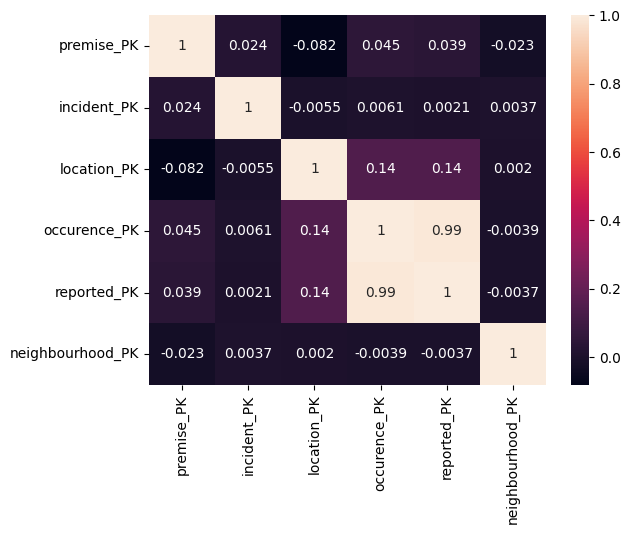

In [33]:
# Correlation analysis for numeric attributes
corr_matrix = crime_fact_table.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Drop highly correlated features if necessary
# crime_fact_table.drop('column_name', axis=1, inplace=True)

#Part C. Detecting Outliers

In [48]:
import numpy as np
from sklearn.svm import OneClassSVM

outlier_data = location[['Longitude', 'Latitude']]

svm = OneClassSVM(kernel='rbf', nu=0.05, gamma=0.1)
svm.fit(outlier_data)

outlier_preds = svm.predict(outlier_data)
location['outlier'] = np.where(outlier_preds == -1, True, False)

outliers = location[location['outlier'] == True]
outliers


,location_PK,Division,Longitude,Latitude,division_encoded,outlier
2,3,D22,0.202006,0.007475,4,True
13,14,D43,0.954229,0.715426,11,True
119,120,D22,0.217035,0.029332,4,True
133,134,D22,0.218117,0.070394,4,True
186,187,D42,0.907804,0.811307,10,True
...,...,...,...,...,...,...
20062,20063,D22,0.231077,0.021855,4,True
20079,20080,D43,0.973277,0.710202,11,True
20094,20095,D42,0.825509,0.871244,10,True
20097,20098,D42,0.812501,0.880578,10,True


In [49]:
from sklearn.preprocessing import StandardScaler
outlier_data = covid_fact_table[['Cases']]

scaler = StandardScaler()
outlier_data_scaled = scaler.fit_transform(outlier_data)

svm = OneClassSVM(kernel='rbf', nu=0.05, gamma=0.1)
svm.fit(outlier_data_scaled)

outlier_preds = svm.predict(outlier_data_scaled)
covid_fact_table['outlier'] = np.where(outlier_preds == -1, True, False)

outliers = covid_fact_table[covid_fact_table['outlier'] == True]
outliers


,Cases,year,month,neighbourhood_PK,outlier
0,1,2020,1,94,True
4,1,2020,6,94,True
22,794,2021,12,94,True
23,452,2022,1,94,True
36,1,2020,1,63,True
...,...,...,...,...,...
4779,682,2021,4,2,True
4787,573,2021,12,2,True
4788,605,2022,1,2,True
4839,1,2020,8,50,True
